In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import json
import time
from datetime import datetime
import matplotlib.pyplot as plt 

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Variables for holding sentiments
sentiments = []

# Target Account
target_news = ("@BBC", "@CBS","@CNN", "@FoxNews", "@nytimes")

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for target in target_news:
    

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target, count = 100)
    tweet_no = 1

    # Loop through all tweets 
    for tweet in public_tweets:
        
        # Print Tweets
        # print("Tweet {counter}: {tweet["text"]})
        # Run Vader Analysis on each tweet
        print("Tweet %s: %s" % (counter, tweet["text"]))
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

    
        # Add sentiments for each tweet into a list
        sentiments.append({"Date": tweet["created_at"],
                           "News Outlet": target,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweet Text" : tweet_text,
                           "Tweets Count": tweet_no})
        
        # Add to counter
        tweet_no +=1
        counter += 1

Tweet 1: Gary Barlow and his ten-piece band perform songs including Greatest Day, Back for Good and Rule the World against t… https://t.co/xAcRAKlkmn
Tweet 2: The world's greatest classical musical festival is back! 🎶🎻👏 @bbcproms 2018

First Night of the Proms | 8:30pm |… https://t.co/JKCkC5EMMs
Tweet 3: RT @BBCSport: This is some semi-final.

Watch Kevin Anderson and John Isner live on @BBCTwo and online.

https://t.co/gmKgD0Vwbx https://t.…
Tweet 4: When someone gets sassy but you've got a killer comeback... 😂👏 @robbrydon #WILTY

https://t.co/cmdBgsfTm1
Tweet 5: The best time to plant a tree was 20 years ago. The second best time is now. 🌳

Eight Chinese proverbs to help with… https://t.co/zqSO489S8G
Tweet 6: When your colleagues ask why you need to leave work at 5pm on the dot... 🍷💃

#FridayFeeling #Versailles https://t.co/Tmba34H72w
Tweet 7: RT @BBCNews: Downton Abbey film finally confirmed https://t.co/VcQvk7lFJb
Tweet 8: "I can't pay you, but you can use the photos in your portfo

Tweet 101: Stand up. Speak up. Blow the whistle. 

Don't miss the premiere of the @TrueCrimeCBS series #Whistleblower tonight… https://t.co/uNhx4Codc2
Tweet 102: RT @TheNeighborhood: There's a new family on the block, and they're about to turn this neighborhood upside down. @CedEntertainer and @Tichi…
Tweet 103: Take a walk down @YandR_CBS memory lane with stars @JessWaltonYR and Peter Bergman! You can watch full episodes of… https://t.co/MZEUfiJJyb
Tweet 104: RT @TKOCBS: Prepare to have some major FUN. #TKO starts NOW! https://t.co/i2ftL6GCj5
Tweet 105: It’s fun, different, unique, and finally here! @TKOCBS hosted by @KevinHart4real premieres at 9/8c on CBS and… https://t.co/MCeVLVK85i
Tweet 106: RT @MagnumPICBS: Talk about hands-on research! #MagnumPI's cast had the honor of joining the US Navy Submarine Force, US Pacific Fleet #Sub…
Tweet 107: Time to mark your calendars! CBS' fall 2018 premiere lineup has been announced: https://t.co/yYv3H9aEO7 https://t.co/lRxAA7suie
Tweet 108: RT

Tweet 201: A particle called a neutrino was detected on Earth, found by sensors deep in the Antarctic ice, and traced to its s… https://t.co/2hYUZxCN18
Tweet 202: Donald Trump says he's more popular than Abraham Lincoln. That's a hard claim to back up. https://t.co/OuPCv74UuU https://t.co/8Vq521unnS
Tweet 203: Nancy Sinatra, the first wife of singer Frank Sinatra, died Friday at the age of 101, her daughter said https://t.co/Vrg3IJD89f
Tweet 204: A Florida man had a heart attack while laying sod in his front yard to avoid getting a fine from his homeowner's as… https://t.co/kR8NfiUSis
Tweet 205: A jury has awarded $4.62 billion to 22 women who sued pharmaceutical giant Johnson &amp; Johnson alleging their ovarian… https://t.co/rQDYbNWZTD
Tweet 206: These giant avocados are growing in Australia. Some have been known to weigh up to four pounds and are about five t… https://t.co/cgXFVEx1o5
Tweet 207: President Trump and Katy Perry are among the Twitter users hit hardest by the follower pu

Tweet 301: UK police confirm source of Novichok poisoning https://t.co/JCXQj6CzII
Tweet 302: Sen. @LindseyGrahamSC: "Russia did interfere in our election, and if I were the president, I would not ask Putin di… https://t.co/3rApgOhFez
Tweet 303: Texas fishermen pull 8-foot alligator gar from river: 'She's a beast' https://t.co/UpYe8MxNZf
Tweet 304: .@FLOTUS helps children to make poppies as she meets British military veterans known as "Chelsea Pensioners" at the… https://t.co/rn4wJPbrMH
Tweet 305: .@SpeakerRyan says woodchucks 'ate' his SUV -- and he's not alone https://t.co/bueGmwg3of
Tweet 306: Chinese spy ship lurking off Hawaiian coast amid huge naval exercise: US officials https://t.co/JHUpiIaNvE
Tweet 307: What's the GRU, Russia's military intelligence agency? 3 things to know https://t.co/2ocaQqcdl3
Tweet 308: Leon Aron on Trump, Putin meeting: "I think what @POTUS wants to show most of all, is that he can succeed where… https://t.co/rym24Wcq3n
Tweet 309: .@NASA shares creepy ima

Tweet 401: RT @NYTNational: The volunteers of The Águilas del Desierto - Eagles of the Desert - work to find bodies of immigrants who died while makin…
Tweet 402: Nancy Barbato Sinatra, an Idol’s First Wife and Lasting Confidante, Dies at 101 https://t.co/Q4xT0ZOktH
Tweet 403: "I get discriminated against all the time. No one thinks I’m a CEO. I sit on a plane and tell somebody, 'Well, I ru… https://t.co/mjB9vBw1TZ
Tweet 404: “She so ugly I almost threw up. Ew.”
“I was just staring at your bbbooo.....i mean eyes.”
“Go back to the kitchen a… https://t.co/yRDgH7oKDf
Tweet 405: RT @NYTMetro: Designs include skulls, flaming hearts with swords piercing them, spiders, roses, jellyfish, an upside-down bat, and a unicor…
Tweet 406: Trump Walks in Front of Queen Elizabeth, Causing Social Media Frenzy https://t.co/22TQkfSosk
Tweet 407: No one will win the Nobel Prize in Literature this year. But you — along with the librarians of Sweden — can help c… https://t.co/rvMxGcauHt
Tweet 408: Wilbur Ros

In [6]:
 # Convert sentiments to DataFrame
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments

,Compound,Date,Negative,Neutral,News Outlet,Positive,Tweet Text,Tweets Count
0,0.7964,Fri Jul 13 20:32:04 +0000 2018,0.000,0.728,@BBC,0.272,Gary Barlow and his ten-piece band perform son...,1
1,0.8268,Fri Jul 13 18:31:05 +0000 2018,0.000,0.688,@BBC,0.312,The world's greatest classical musical festiva...,2
2,0.0000,Fri Jul 13 18:30:37 +0000 2018,0.000,1.000,@BBC,0.000,RT @BBCSport: This is some semi-final.\n\nWatc...,3
3,-0.7876,Fri Jul 13 17:32:04 +0000 2018,0.331,0.669,@BBC,0.000,When someone gets sassy but you've got a kille...,4
4,0.9022,Fri Jul 13 17:02:05 +0000 2018,0.000,0.665,@BBC,0.335,The best time to plant a tree was 20 years ago...,5
5,-0.0516,Fri Jul 13 15:59:00 +0000 2018,0.062,0.938,@BBC,0.000,When your colleagues ask why you need to leave...,6
6,0.0000,Fri Jul 13 15:47:44 +0000 2018,0.000,1.000,@BBC,0.000,RT @BBCNews: Downton Abbey film finally confir...,7
7,0.0382,Fri Jul 13 15:04:04 +0000 2018,0.000,0.952,@BBC,0.048,"""I can't pay you, but you can use the photos i...",8
8,-0.7579,Fri Jul 13 12:03:03 +0000 2018,0.427,0.418,@BBC,0.155,"The secret to a long, happy relationship? \n\n...",9
9,0.3182,Fri Jul 13 11:03:03 +0000 2018,0.000,0.881,@BBC,0.119,The original 1926 map of The Hundred Acre Wood...,10


In [7]:
# Save Dataframe as CSV file.
news_sentiments.to_csv("News_Mood.csv", index=False)

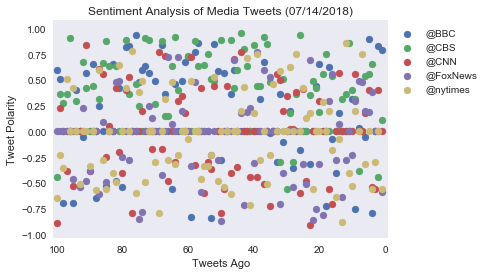

In [24]:
#Plot scatterplot graph.

# Set the x limit,
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in target_news:
    dataframe = news_sentiments.loc[news_sentiments["News Outlet"] == user]
    plt.scatter(dataframe["Tweets Count"],dataframe["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets (07/14/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()
# Save image of scatter plot
plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [25]:
# aggregate compound sentiments analyzed by VADER
average_sentiment = news_sentiments.groupby("News Outlet")["Compound"].mean()
average_sentiment

News Outlet
@BBC        0.137211
@CBS        0.348781
@CNN       -0.005604
@FoxNews   -0.053629
@nytimes   -0.033688
Name: Compound, dtype: float64

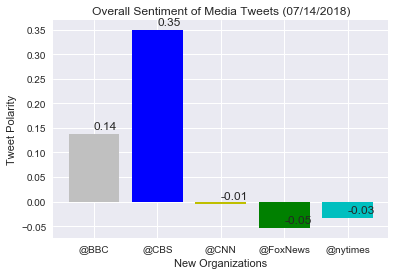

In [26]:
# Bar plot = _overall_ sentiments (last 100 tweets)
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])

# Label plot, plot title (date of analysis), axes labels
plt.title("Overall Sentiment of Media Tweets (07/14/2018)")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")

# Save image of bar plot
plt.savefig("Overall Sentiments of Media Tweets")
plt.show()